# Scalars, vectors and their operations
<b><div style="text-align: right">[TOTAL POINTS: 30]</div></b>

In this assignment, you will learn how vectors can be used in the field of **Natural Language Processing**. Here you will implement the measure of `cosine similarity`, `dot product` and `L2 norm` to understand how they can be used to find similarity between texts. 

### Import required libraries
Run the cell below to import the required libraries.

In [1]:
import numpy as np # numpy is used to perform mathematical operations
import matplotlib.pyplot as plt # this library helps in plotting and visualizing results
import pickle # this library is used to retrieve and store python objects from/to disks

### Tokenize and vectorize sentences
For this section you simply need to execute the cells below and observe how the code does the required operations. These cells vectorize sentences for comparision. 
Sentences or text in natural language consist of vocabulary which form the elemental part. The text must be vectorized in order to perform mathematical operations on them. Vectorization can be done in various ways. Here we will observe two ways:
*  Sparse-sentence vectors
*  Dense word vectors

**Sparse sentence vectors**:
In this method of vectorization vocabulary is first constructed by decomposing all sentences into tokens and keeping a dictionary of distinct tokens. The sentences are then vectorized, with each vector for a sentence representing the number of times a token occurs in a sentence. You will see how each of these is done in deatil below.

In [2]:
# First we define sentences that we want to compare.
# Sentences are stored in a list

sentences = ["It is such a good day.",
             "Hello!, how are you doing?",
             "Such a wonderful day it is.",
             "How do you do folks?",
             "What time is it right now?",
             "When is your birthday?",
             "When do you usually return from work?",
             ]

In [3]:
'''the function below tokenizes a sentence
i.e. it takes in a sentence as input and returns
a list of words all in lowercase by removing any punctuations like full-stops(.), commas(,),
question marks(?) and exclamation marks(!)'''

def tokenize(sentence):
    res  = [] # initialize empty list for resutls
    for word in sentence.split(' '): # split the at spaces sentence to separate words 
        res.append(word.strip('?.,!').lower()) # strip the words and convert them to lowercase 
                                           # then remove the punctuations and append to list
    return res # return tokens


# using the tokenize() function prepare a list of tokenized sentences
# from a list of sentences defined above
# each element of tokenized_sentences list is another list of tokens
# representing tokens generated from each individual sentence 
tokenized_sentences = [tokenize(sentence) for sentence in sentences]

# create a list of distinct tokens
tokens = [] # initilize list of tokens
for sublist in tokenized_sentences: 
    for item in sublist:
        tokens.append(item) # append each token from all sentences to the list of tokens

# Since, the same token may be present in multiple sentences the list of tokens contains duplicates
# remove the duplicates by converting the tokens into a set
tokens = set(tokens) 

# now convert the set back to list which now does not contain any duplicate
tokens = list(tokens)

# then sort the list so that our vector can have a fixed sorted order
tokens = sorted(tokens)

# finally create a dictionary mapping each word to its index in the sorted list
# this index for this token is then used to represent its position in a vector
word2index = dict() # initialize a dictionary
for i,token in enumerate(tokens):
    word2index[token] = i # mapping

In [4]:
# now vectorize sentences by converting them into numpy arrays

# first initilize a vector of zeros to accommodate
# len(sentences) number of vectors
# each with dimension len(tokens)
vectors = np.zeros((len(sentences),len(tokens))) 


for i,sentence in enumerate(tokenized_sentences): # go through each sentence in the list
    for j,word in enumerate(sentence): # go through each token in each sentence
        vectors[i][word2index[word.lower()]] += 1   # update the number of times a token appears in the sentence
    
# see how the sentences have been vectorized by print them out
print("Sentence 0: '{}' ".format(sentences[0]))
print("sentence[0] is vectorized as follows:")
print(vectors[0])
for i in range(len(tokens)):
    print(tokens[i], " -> ", vectors[0][i])


Sentence 0: 'It is such a good day.' 
sentence[0] is vectorized as follows:
[1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0.]
a  ->  1.0
are  ->  0.0
birthday  ->  0.0
day  ->  1.0
do  ->  0.0
doing  ->  0.0
folks  ->  0.0
from  ->  0.0
good  ->  1.0
hello  ->  0.0
how  ->  0.0
is  ->  1.0
it  ->  1.0
now  ->  0.0
return  ->  0.0
right  ->  0.0
such  ->  1.0
time  ->  0.0
usually  ->  0.0
what  ->  0.0
when  ->  0.0
wonderful  ->  0.0
work  ->  0.0
you  ->  0.0
your  ->  0.0


Now we have vectorized the sentences to create sparse vectors out of them. The vectors are called sparse because they are mostly as you have seen above. 

**Now it's your time to write some code**

Below you will imeplement dot product of two vectors, the L2 norm of a vector and cosine similarity measure. These implementations will then be used to compare the similarity between all pairs of sentences in the list defined above.

## Exercise 1: Implement dot product
<b><div style="text-align: right">[POINTS: 10]</div></b>
Implement dot product for two vectors.

**Task:** Build a function `dot_product(a,b)` that takes in two vectors `a` and `b` and returns the dot product of two vectors.

In [6]:
def dot_product(a,b):
    return np.dot(a,b)

# YOUR CODE HERE
print(dot_product([2,2],[[1,2],[3,4]]))

[ 8 12]


In [7]:
### INTENTIONALLY LEFT BLANK

## Exercise 2: Implement L2 norm

<b><div style="text-align: right">[POINTS: 10]</div></b>
Implement L2 Norm for a vector.

**Task:** Build a function `l2_norm(a)` that takes in one vector `a` and returns the L2 norm of the vector.

In [8]:
def l2_norm(a):
    return np.sqrt(np.sum([i *i for i in a]))


# YOUR CODE HERE
print(l2_norm([3,4]))

5.0


In [ ]:
### INTENTIONALLY LEFT BLANK

## Exercise 3: Calculate cosine similarity
<b><div style="text-align: right">[POINTS: 10]</div></b>
Implement cosine similarity of two vectors. Cosine similarity is the cosine of the angle between two vectors. The lesser the angle between them, greater is their similarity. Since, `cos(0) = 1`, the vectors which are parallel (i.e. having all features in common) to each other receive a full score of `1` and orthogonal vectors (i.e. having no features in common) receive a score of `0`. 

**Task:** 
- Build a function `cosine_similarity(a,b)` that takes in two vectors `a` and `b` and returns the cosine of the angle between the vectors.
- You can refer to the formula from the reading material to compute the similarity.

In [9]:
def cosine_similarity(a,b):
    numerator = np.sum([x*y for x,y in zip(a,b)])
    denomenator = l2_norm(a) * l2_norm(b)
    return numerator/denomenator

# YOUR CODE HERE
print(cosine_similarity([1,4],[2,4]))

0.9761870601839528


In [10]:
### INTENTIONALLY LEFT BLANK

### Visualize cosine similarity between pairs:
Now it is time to visualize how our effectiveness of **sparse vector model**  in measuring similarity, by using the code we have written together above . Execute the cell below and observe its working and the plot produced.

Sentence  0 :  It is such a good day.
Sentence  1 :  Hello!, how are you doing?
Sentence  2 :  Such a wonderful day it is.
Sentence  3 :  How do you do folks?
Sentence  4 :  What time is it right now?
Sentence  5 :  When is your birthday?
Sentence  6 :  When do you usually return from work?


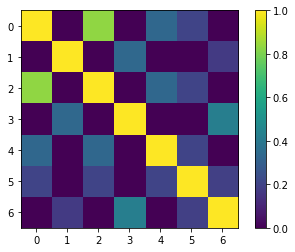

In [11]:
# define x and y coordinates for the grid
# each axis represents sentences in the list
# the color in grid formed by the intersection of i-th and j-th sections of the axis
# gives the similarity between the corresponding i-th and j-th sentences from the list
X = np.arange(0,len(sentences))
Y = np.arange(0,len(sentences))

# create all combinations of sentence indices using meshgrid fucntion
X,Y = np.meshgrid(X,Y)

# flatten them for iteration
X_t = X.reshape(-1)
Y_t = Y.reshape(-1)

# initilize list for computing similarity value
Z = []


for i in range(len(X_t)): # for every pair of sentences compute their similarity
    Z.append(cosine_similarity(vectors[X_t[i]],vectors[Y_t[i]]))

# reshape the Z array into 2-D grid for visualization
Z = np.array(Z).reshape(len(sentences),len(sentences))

# show the gird and colorbar
plt.imshow(Z)
plt.colorbar()

# print the list of sentences for ease of comparision
for i, sentence in enumerate(sentences):
    print("Sentence ", i ,": ", sentence)

In the above grid, we see that the colors in the main diagonal is `yellow`, representing maximum similarity, which is as expected because a sentence is indeed similar to itself. Sentence 0 and 2 have `green` color indicating high similarity which is as expected. This form of similarity works well for many use cases, but fails when the vocabulary grows. 

### Visualize word2vec embedding vectors
In the above example, we simply tokenized sentences by considering every word as a distinct token and vectorized the senteces with respect to those tokens. This process though useful, is limited due to its inability to understand the similarity between words through their meaning. Also, such form of vectorization gives sparse representation for sentences, due to which other forms of similarity measures such as (or L2) distance, Manhattan (or L1) distance do not give meaning and addition of vectors also do not make much sense.

While performing natural language processing (NLP) with deep learning, words are vectorized by learning dense embeddings. These embeddings are vector representation of words and loosely follow the laws of vector spaces. Addition with such vectors produce sensible results, the examples of which you can visualize by running the cells below.

In this example, we take limited words from a pretrained model of word2vec stored as a dictionary in the "*embeddings.pickle*" file. Here, we treat the word2vec as a black box model and only manipulate vectors and measure the notion of similarity. The embeddings were obtained from the following source and has the characteristics mentioned below:

**Source:**: https://fasttext.cc/docs/en/english-vectors.html

Number of Instances: 1 million

Number of Dimensions: 300

---

- The dataset consists of 1 million word vectors trained on Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens).


In [12]:
# load the pickle file "embeddings.pickle" into the word_vectors dictionary
with open('embeddings.pickle', 'rb') as handle:
    word_vectors = pickle.load(handle)

FileNotFoundError: [Errno 2] No such file or directory: 'embeddings.pickle'

In [ ]:
# given a vector find the most similar word from the dictionary of word vectors
def most_similar_vector(vector, word_vectors):
    mx = 0 # initialize maximum value
    argmx = None # initialize the word to None
    for key,v in word_vectors.items():
        sim = cosine_similarity(v,vector)
        if(sim>mx):
            mx = sim
            argmx = key
    return argmx, mx # return word, similarity value

# given a word already in the dict find the most similar word other than itself from the dictionary of word vectors
def most_similar_word(word, word_vectors):
    mx = 0
    argmx = None
    for key,v in word_vectors.items():
        if(word!=key):
            sim = cosine_similarity(v,word_vectors[word])
        if(sim>mx):
            mx = sim
            argmx = key
    return argmx, mx  # return word, similarity value

# print the words for which we have embeddings
print("Total number of words: ",len(word_vectors.items()))
for key, value in word_vectors.items():
    print(key, end=', ')

In the example below, using the word2vec embeddings, we can see that by removing some scale of `man` from `king` and adding some scale of `woman` to it makes the vector most similar to `queen`. This operation makes sense intuitively and using deep learning we are able to capture such meanings and relations between words in the form of vectors. We also see that the word `mountain` is most similar to `hill` from the list of words.

In [ ]:
print(most_similar_vector(word_vectors["king"]-2*word_vectors["man"]+1.75*word_vectors["woman"],word_vectors))
print(most_similar_word("hill",word_vectors))